In [70]:
import pandas as pd 
import numpy as np

In [71]:
data=pd.read_csv("Downloads/titanic-passengers .csv", encoding="ISO-8859-1", sep=';')
data.head(-5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
881,699,No,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
882,775,Yes,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S
883,809,No,2,"Meyer, Mr. August",male,39.0,0,0,248723,13.0000,NaN,S
884,278,No,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S


In [72]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Age']

elements=len(data['Cabin'])
data['Cabin'].fillna('B96 B98', inplace=True)
data['Cabin']

elements=len(data['Embarked'])
data['Embarked'].fillna('S',inplace=True)
data['Embarked']
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,B96 B98,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,B96 B98,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,B96 B98,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,B96 B98,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,B96 B98,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,B96 B98,S


In [73]:
data["Survived"]=data["Survived"].map({"Yes": 1, "No": 0}) 
data["Sex"]=data["Sex"].map({"female": 1, "male": 0}) 
data['FamilySize']= data['SibSp']+data['Parch']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,B96 B98,S,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S,0
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,B96 B98,S,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,B96 B98,S,4
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S,1


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [75]:
x1 = data[['Pclass', 'Age','Sex','FamilySize']]
y1 = data['Survived']

x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.25,random_state=0)

logreg = LogisticRegression()   
logreg.fit(x1_train, y1_train)  
y1_pred  = logreg.predict(x1_test)    
print("Accuracy={:.2f}".format(logreg.score(x1_test, y1_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Age', ylabel='Survived'>

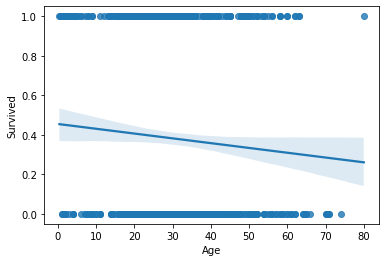

In [76]:
import seaborn as sns
sns.regplot(x='Age',y='Survived',data=data)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

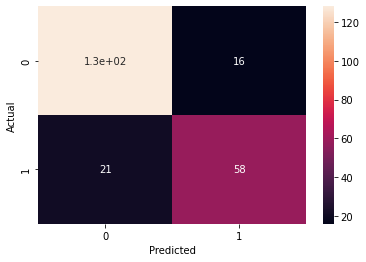

In [77]:
confusion_matrix = pd.crosstab(y1_test, y1_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       144
           1       0.78      0.73      0.76        79

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



## ROC-AUC

AUC-ROC curve is a performance measurement for the classification problems at various threshold settings. 

ROC is a probability curve that plots the TPR (True Positive Rate/Recall/Sensitivity) against FPR (False Positive Rate) at various threshold values. 

AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between passengers who survived and dind't survive.

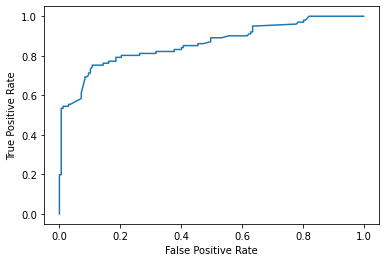

In [79]:
X = data[['Age', 'Sex', 'Pclass','FamilySize']]
y = data['Survived']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 


log_regression = LogisticRegression()


log_regression.fit(X_train,y_train)

y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)


plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

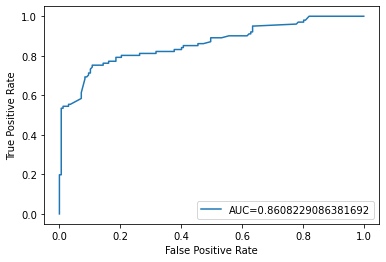

In [80]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)


plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

AUC>0.8 : The model is considered good at distinguishing the passenegers who survived from those who died.